In [ ]:
!pip install pandas
!pip install openpyxl
!pip install numpy
!pip install future


In [1]:
import numpy as np
import pandas as pd
from __future__ import print_function

In [2]:
# Excel dosyasının indirme bağlantısı
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

# Dosyayı indirin ve bir veri çerçevesine yükleyin
df = pd.read_excel(url ,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [3]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [13]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [14]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=195, step=1)

In [16]:
df.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [19]:
df.shape

(195, 43)

In [4]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(1)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [288]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [296]:
df['Total'] = df.loc[:, 1980:2013].sum(axis=1)

In [73]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [37]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [38]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [301]:
years =list(range(1980, 2014,1)) 
df.set_index('Country', inplace=True)
df.index.name = None
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [82]:
df.loc['Haiti', years]

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

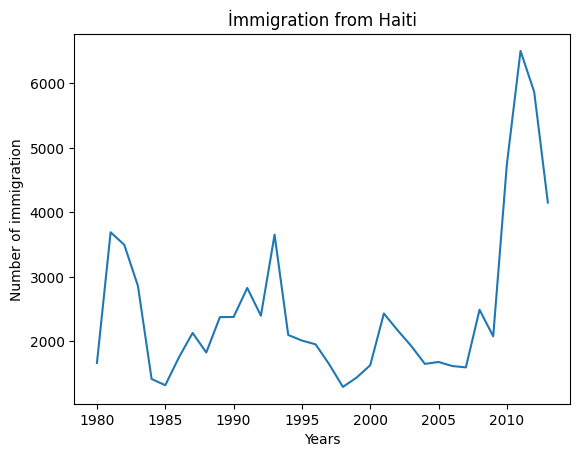

In [83]:
df.loc['Haiti', years].plot(kind = 'line')
plt.title('İmmigration from Haiti')
plt.ylabel('Number of immigration')
plt.xlabel('Years')

plt.show()

In [84]:
df_sort = df.sort_values(['Total'], ascending = False, axis=0)

In [85]:
df_sort

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [94]:
df_top5 = df_sort.head()


In [103]:
df_top5=df_top5[years].transpose()

In [106]:
df_new=df_top5.head()

In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt

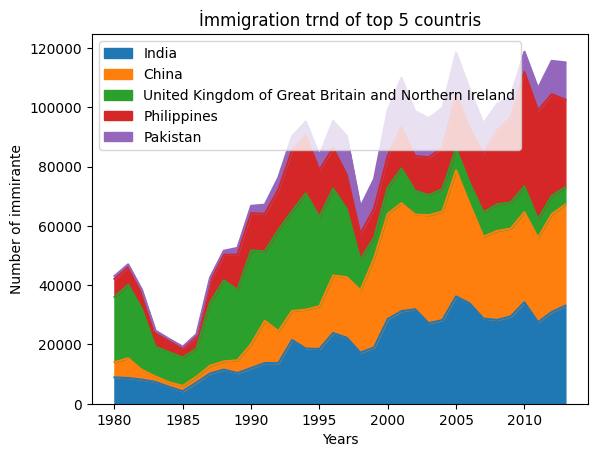

In [109]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
df_top5.plot(kind = 'area')

plt.title('İmmigration trnd of top 5 countris')
plt.ylabel('Number of immirante')
plt.xlabel('Years')
figsize=(20, 10)

plt.show()

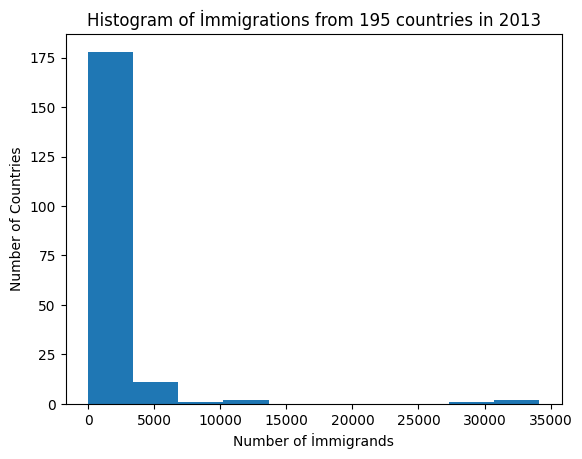

In [119]:
df[2013].plot(kind='hist')

plt.title('Histogram of İmmigrations from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of İmmigrands')


plt.show()

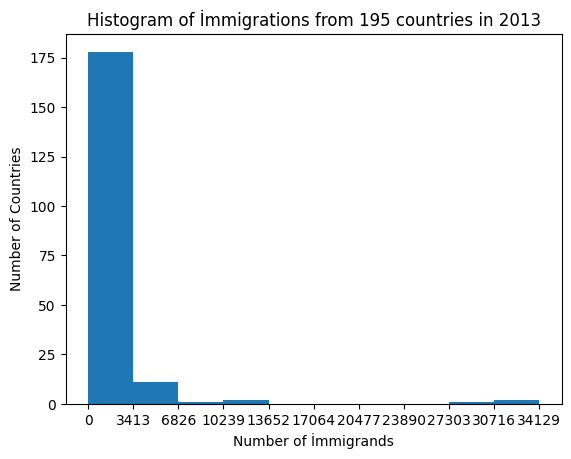

In [122]:
count , bin_edges=np.histogram(df[2013])
df[2013].plot(kind='hist' , xticks= bin_edges)

plt.title('Histogram of İmmigrations from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of İmmigrands')


plt.show()

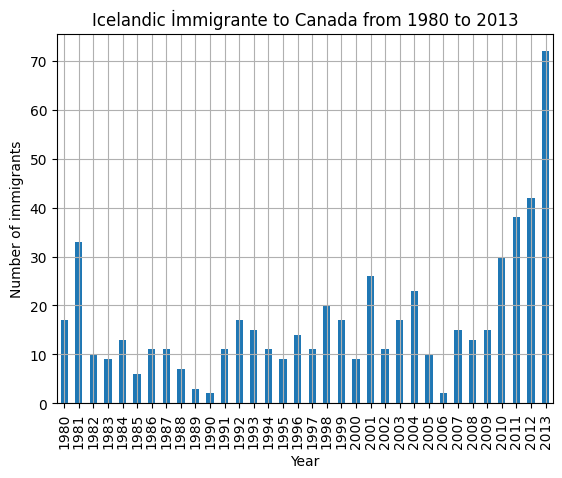

In [302]:
df_iceland = df.loc['Iceland', years]

df_iceland.plot(kind='bar')
plt.title('Icelandic İmmigrante to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.grid()
plt.show()

In [139]:
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [151]:
Num_df = df.drop('Region', axis=1)
Num2_df=Num_df.drop('DevName', axis=1)


In [153]:
df_conti = Num2_df.groupby('Continent' , axis=0).sum()

In [155]:
df_conti.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


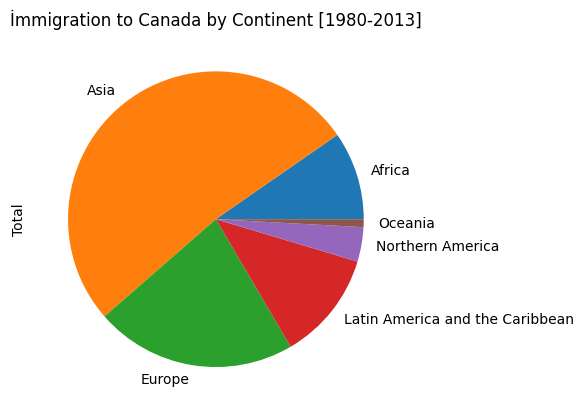

In [156]:
df_conti['Total'].plot(kind= 'pie')

plt.title('İmmigration to Canada by Continent [1980-2013]')

plt.show()

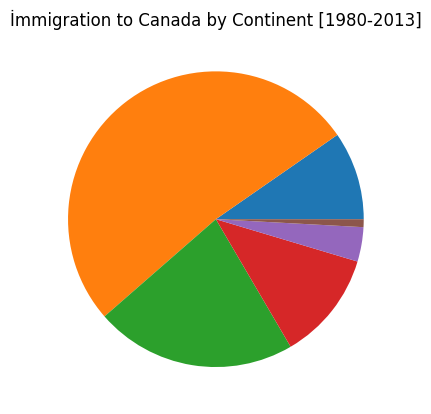

In [299]:
plt.pie(df_conti['Total']) #Matplotlib farklı gösterim kullanım

plt.title('İmmigration to Canada by Continent [1980-2013]')

plt.show()

In [157]:
df_japan = df.loc[['Japan'], years].transpose()

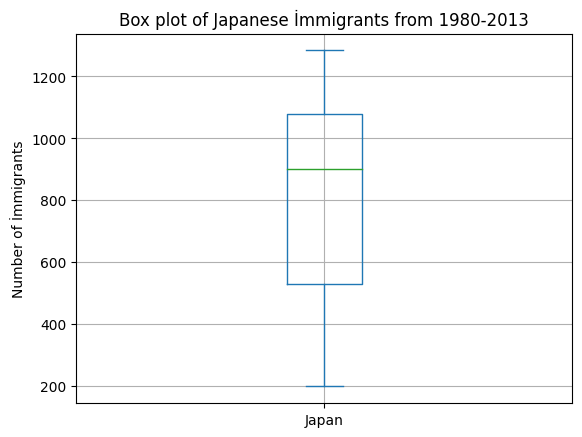

In [298]:
df_japan.plot(kind = 'box')

plt.title('Box plot of Japanese İmmigrants from 1980-2013')
plt.ylabel('Number of İmmigrants')
plt.grid()
plt.show()

In [190]:
df_total = pd.DataFrame(df[years].sum(axis=0))
df_total.head()
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ['years','total']
df_total.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Text(0, 0.5, 'Number of İmmirante')

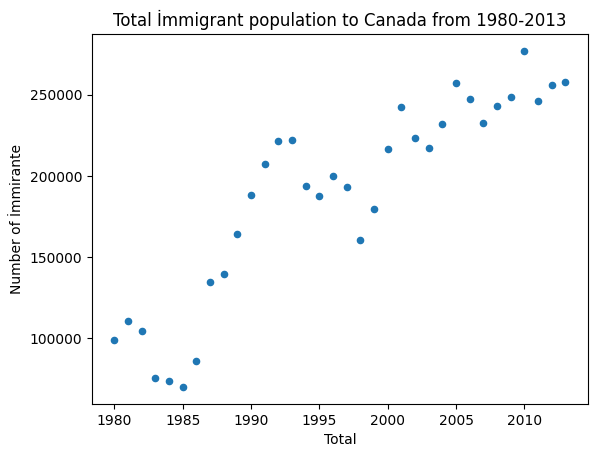

In [195]:
df_total.plot(kind = 'scatter', x='years', y='total')

plt.title('Total İmmigrant population to Canada from 1980-2013')
plt.xlabel('Total')
plt.ylabel('Number of İmmirante')


In [198]:
import seaborn as sns

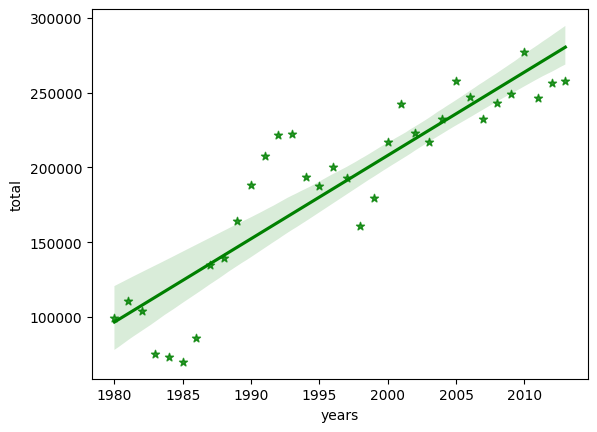

In [205]:
ax = sns.regplot (x='years' , y='total' , color='green',marker='*', data=df_total)

In [208]:
import folium #Harita içiçn kütüphane

In [227]:
Canada_map = folium.Map(
    location=[56.130,-106.35],  #Kanada kordinatları
    zoom_start=4,
    tiles='Stamen Terrain'
)

ontario = folium.map.FeatureGroup()


ontario.add_child(
    folium.features.CircleMarker([51.25, -85.32], radius=5,
                                 color='red', fill_color = 'red'
                                )
)
Canada_map.add_child(ontario)

folium.Marker([51.25, -85.32],
              popup='Ontario').add_to(Canada_map)

In [292]:
import folium

In [293]:
import requests
import json

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json"
response = requests.get(url)

if response.status_code == 200:
    data = json.loads(response.text)
    


In [297]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=data,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
    
)
world_map

C:\Users\Ramazan\AppData\Local\Programs\Python\Python311\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
